# Table of Contents
1. [📊 Understand the Data](#understand-the-data)
2. [🧹 Data Cleaning](#data-cleaning)
   1. [Best practice](#best-practice)
3. [🔍 Analysis](#analysis)
   1. [Correlation  Matrix ](#31)
   2. [Sleep Duration](#32)
   3. [Sleep Quality, Duration, and Study Hours](#33)
   4. [Relationship between Sleep Duration and Study Hours](#34)
   5. [ Affect of Caffeine](#35)
   6. [Sleep Quality and Physical Activity](#36)
   7. [Distribution of Sleep Start and End Times on Weekdays vs Weekends](#37)
4. [📈 Conclusion](#conclusion)


<a id="understand-the-data"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter One</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Understand the Data 📊
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [1]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from tabulate import tabulate

import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Student Sleep Pattern\student_sleep_patterns.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
463,464,18,Male,1st Year,4.7,8.8,1.8,4,22,7,13.37,8.49,7.15,7.03
77,78,21,Other,1st Year,8.5,5.7,1.6,5,46,7,6.54,14.04,6.32,7.35
462,463,23,Male,2nd Year,6.0,1.8,2.8,4,115,9,7.31,18.75,5.55,10.28
377,378,18,Female,1st Year,7.9,1.3,3.8,2,19,9,13.21,20.15,5.67,10.99
215,216,22,Male,3rd Year,7.1,3.1,1.3,1,68,6,17.65,2.20,8.16,8.93
134,135,24,Female,1st Year,5.2,1.3,3.5,3,97,5,4.51,5.40,7.93,8.78
183,184,20,Female,2nd Year,8.9,8.6,1.2,2,46,6,5.20,17.67,5.24,8.30


In [3]:
print("The size of the DataFrame:",df.size, '\n')
print('The Shape of the DataFrame', df.shape, '\n')
print("Available columns in the DataFrame:", df.columns)

# Calculate memory usage of the DataFrame
memory_size = df.memory_usage(deep=True).sum()
memory_size_mb = memory_size / (1024 ** 2)
print(f"\nEstimated memory size: {memory_size_mb:.2f} MB")


The size of the DataFrame: 7000 

The Shape of the DataFrame (500, 14) 

Available columns in the DataFrame: Index(['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'],
      dtype='object')

Estimated memory size: 0.10 MB


In [4]:
# Get info summary
info = {
    "Index": df.index,
    "Columns": df.columns.tolist(),
    "Non-Null Count": df.notnull().sum().tolist(),
    "Dtype": df.dtypes.tolist()
}

# Convert to a format suitable for tabulation
info_table = zip(info["Columns"], info["Non-Null Count"], info["Dtype"])

# Print the summary information in a table format
print(tabulate(info_table, headers=["Column", "Non-Null Count", "Dtype"], tablefmt="rounded_grid"))

╭─────────────────────┬──────────────────┬─────────╮
│ Column              │   Non-Null Count │ Dtype   │
├─────────────────────┼──────────────────┼─────────┤
│ Student_ID          │              500 │ int64   │
├─────────────────────┼──────────────────┼─────────┤
│ Age                 │              500 │ int64   │
├─────────────────────┼──────────────────┼─────────┤
│ Gender              │              500 │ object  │
├─────────────────────┼──────────────────┼─────────┤
│ University_Year     │              500 │ object  │
├─────────────────────┼──────────────────┼─────────┤
│ Sleep_Duration      │              500 │ float64 │
├─────────────────────┼──────────────────┼─────────┤
│ Study_Hours         │              500 │ float64 │
├─────────────────────┼──────────────────┼─────────┤
│ Screen_Time         │              500 │ float64 │
├─────────────────────┼──────────────────┼─────────┤
│ Caffeine_Intake     │              500 │ int64   │
├─────────────────────┼──────────────────┼────

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
Age,500.0,NaN,NaN,NaN,21.536,2.33315,18.0,20.0,21.0,24.0,25.0
Gender,500,3,Male,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University_Year,500,4,3rd Year,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep_Duration,500.0,NaN,NaN,NaN,6.4724,1.485764,4.0,5.1,6.5,7.8,9.0
Study_Hours,500.0,NaN,NaN,NaN,5.9816,3.475725,0.1,2.9,6.05,8.8,12.0
Screen_Time,500.0,NaN,NaN,NaN,2.525,0.859414,1.0,1.8,2.6,3.3,4.0
Caffeine_Intake,500.0,NaN,NaN,NaN,2.462,1.682325,0.0,1.0,2.0,4.0,5.0
Physical_Activity,500.0,NaN,NaN,NaN,62.342,35.191674,0.0,32.75,62.5,93.25,120.0
Sleep_Quality,500.0,NaN,NaN,NaN,5.362,2.967249,1.0,3.0,5.0,8.0,10.0



<a id="data-cleaning"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Two</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Data Cleaning 🧹
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

<Axes: >

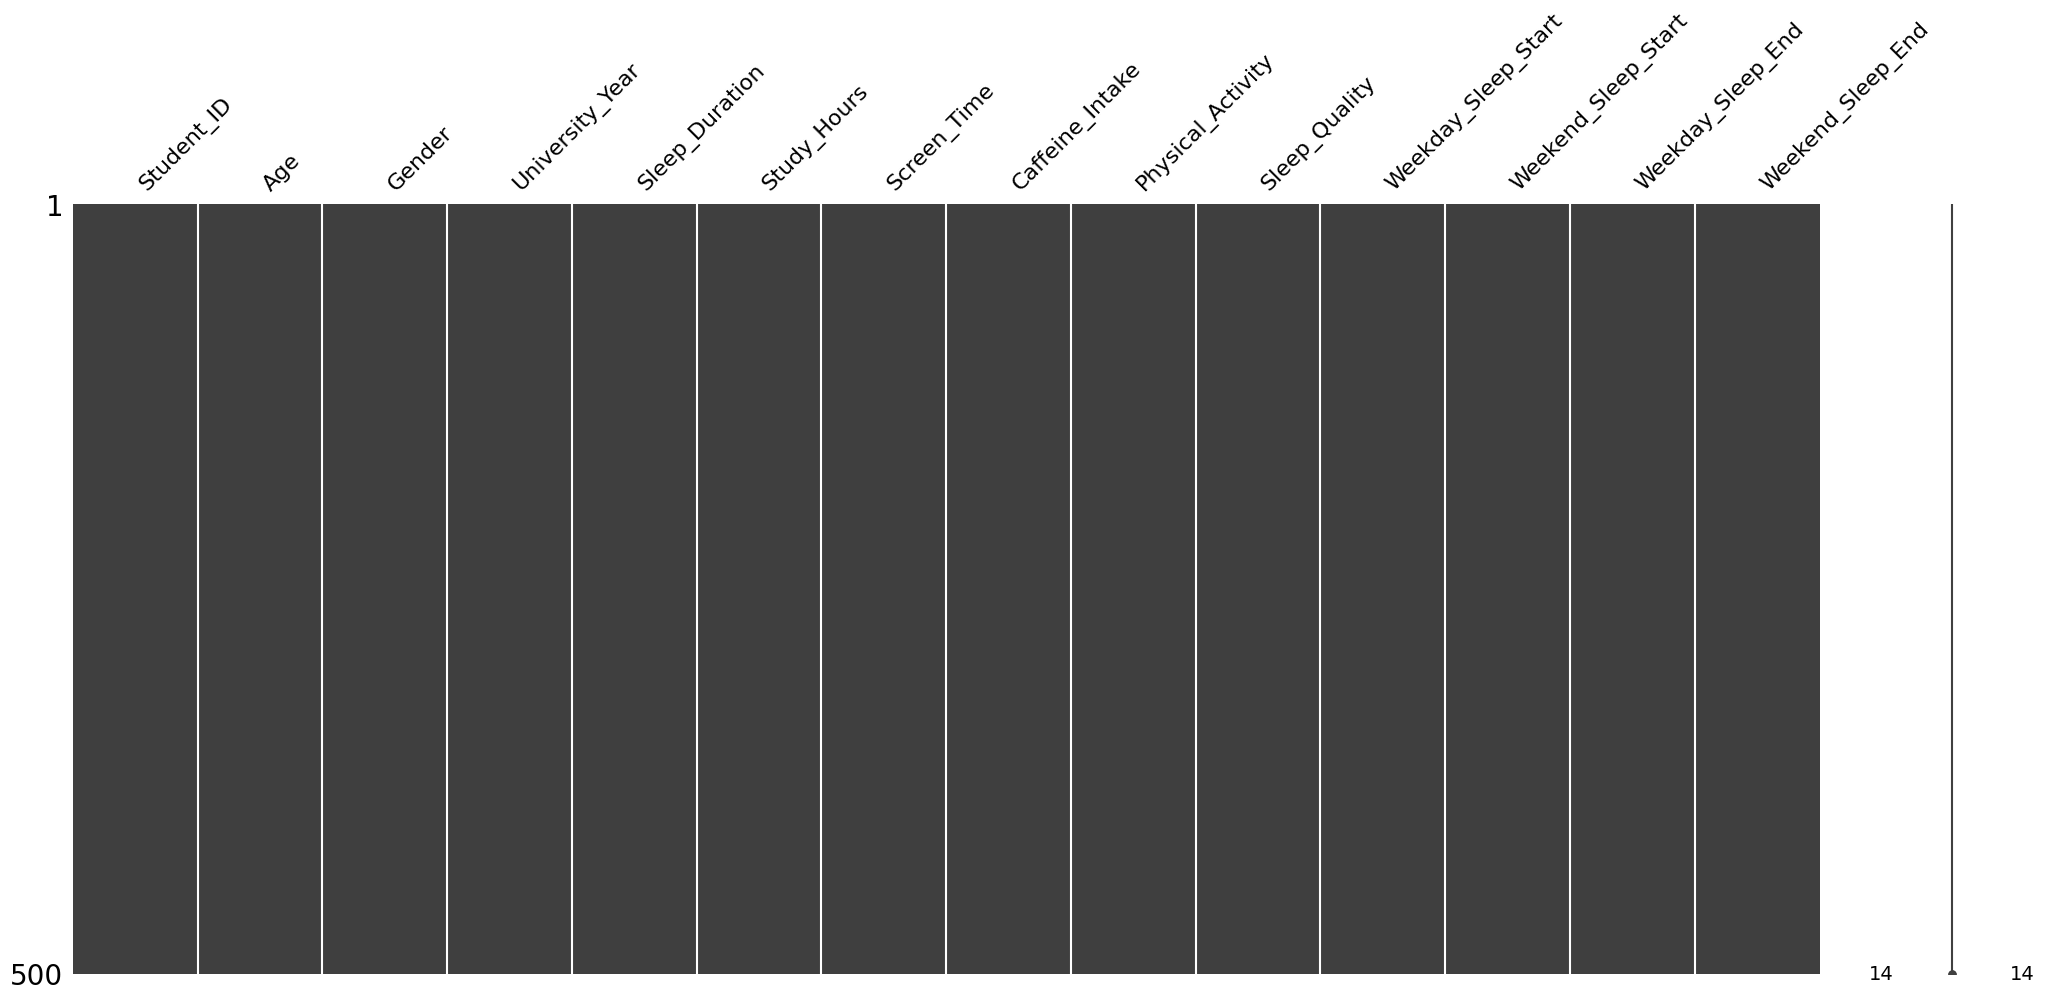

In [8]:
msno.matrix(df)

<a id="best-practice"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
<p style="color: Black;">
   ⭐ <b>Best Practice before clean the data have a copy of Original Data<b>
   <pre  style="color: Black; font-size: 20px;">
   </pre>
</p>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>

In [9]:
dfc = df.copy()

<a id="analysis"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Three</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Analysis 🔍
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


<a id="31"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 1. Correlation  Matrix </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,500.0,250.50000,144.481833,1.00,125.7500,250.500,375.2500,500.00
Age,500.0,21.53600,2.333150,18.00,20.0000,21.000,24.0000,25.00
Sleep_Duration,500.0,6.47240,1.485764,4.00,5.1000,6.500,7.8000,9.00
Study_Hours,500.0,5.98160,3.475725,0.10,2.9000,6.050,8.8000,12.00
Screen_Time,500.0,2.52500,0.859414,1.00,1.8000,2.600,3.3000,4.00
Caffeine_Intake,500.0,2.46200,1.682325,0.00,1.0000,2.000,4.0000,5.00
Physical_Activity,500.0,62.34200,35.191674,0.00,32.7500,62.500,93.2500,120.00
Sleep_Quality,500.0,5.36200,2.967249,1.00,3.0000,5.000,8.0000,10.00
Weekday_Sleep_Start,500.0,11.16686,5.972352,1.08,6.0875,10.635,16.1525,21.93
Weekend_Sleep_Start,500.0,12.37586,5.789611,2.05,7.2975,12.690,17.3275,22.00


In [11]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr().T

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='viridis')
fig.show()

<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# 🌟Insights :  

1. **Sleep Duration Insight**:
   - With 50% of students having a sleep duration of 6.5 hours, it indicates that a significant portion of students may not be getting the recommended 7-9 hours of sleep for optimal health and academic performance. 

2. **Study Hours Analysis**:
   - The average study time of 6 hours suggests a moderate study routine. When coupled with the average sleep duration of 6.5 hours, this could indicate that students are balancing their study schedules with their sleep, although it might not be the most optimal for peak academic performance, as inadequate sleep can affect cognitive functions and concentration.

3. **Screen Time Impact**:
   - The maximum screen time of 4 hours could be a contributing factor to the relatively lower sleep duration. High screen time, especially before bedtime, is known to disrupt sleep quality due to exposure to blue light, which can interfere with the body's natural sleep-wake cycle.

### Overall Conclusion:
The combination of moderate study hours (6 hours), shorter sleep duration (6.5 hours), and significant screen time (up to 4 hours) suggests that students may be experiencing a lifestyle imbalance. Improving sleep quality and reducing screen time before bed could potentially enhance academic performance by allowing students to achieve more restorative sleep. Encouraging better sleep hygiene practices could be a beneficial strategy for optimizing study effectiveness and overall well-being.

</div>

<a id="32"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 2. Sleep Duration  </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>

In [12]:
fig = px.scatter(
    dfc,
    x=dfc['Age'],
    y=dfc['Sleep_Duration'],
    color=dfc['Gender'],
    #symbol=dfc['Gender'],
    size=dfc['Sleep_Duration'],
    size_max=30,
    marginal_y = 'box',
    marginal_x='histogram'
    
)
fig.update_layout(
    title='Sleep Duration by age',
    height=600,
)
fig.show()

In [13]:
fig = px.scatter(
    dfc,
    x=dfc['Age'],
    y=dfc['Sleep_Duration'],
    color=dfc['University_Year'],
    symbol=dfc['Gender'],
    size=dfc['Sleep_Duration'],
    size_max=30,
    marginal_y = 'box',
    marginal_x='histogram',
    facet_row=dfc['Gender'],
)
fig.update_layout(
    title='Sleep Duration of University Student',
    height=1000,
)
  
fig.show()

<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# 🌟Insights :  

Based on the insights from the box plot,

### Overall Sleep Duration:
- **Male Students**: The median sleep duration is 6.2 hours, indicating that male students tend to get slightly less sleep compared to female students.
- **Female Students**: The median sleep duration is 6.75 hours, suggesting that female students generally get more sleep than their male counterparts.

### Sleep Duration by University Year:
- **Male Students**:
  - **1st Year**: The median sleep duration is 6 hours, indicating potentially higher stress or adaptation challenges during the first year of university.
  - **2nd Year**: The median increases to 6.3 hours, suggesting a slight improvement in sleep patterns as students adjust to the academic workload.
  - **3rd Year**: The median sleep duration reaches 6.7 hours, possibly reflecting a better balance between academic demands and sleep.
  - **4th Year**: The median decreases slightly to 6.3 hours, which could be due to increased academic pressure, such as preparing for graduation or final projects.

- **Female Students**:
  - **1st Year**: The median sleep duration is 6.9 hours, indicating that female students start with a higher baseline of sleep compared to males.
  - **2nd Year**: The median increases to 7.05 hours, suggesting an even better sleep pattern as students adapt to university life.
  - **3rd Year**: The median drops to 6.6 hours, potentially due to increased academic responsibilities or extracurricular activities.
  - **4th Year**: The median further decreases to 6.25 hours, which could be attributed to the heightened pressure of completing final requirements and preparing for life after graduation.

### Conclusion:
The data indicates that female students generally maintain better sleep habits than male students across all years. However, for both genders, sleep duration tends to fluctuate throughout their university years, with some improvement during the middle years (2nd and 3rd) and a slight decline in the final year, possibly due to increased academic demands. Encouraging students to adopt better sleep practices, especially during stressful periods, could help improve their overall well-being and academic performance.


</div>

<a id="33"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 3. Sleep Quality, Duration, and Study Hours</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>

In [14]:
fig = px.scatter_ternary(
    dfc,
    a='Sleep_Quality',
    b='Sleep_Duration',
    c='Study_Hours',
    color='Gender',
    size='Study_Hours',
    size_max=10,
    labels={'Sleep_Quality': 'Sleep Quality', 'Sleep_Duration': 'Sleep Duration', 'Study_Hours': 'Study Hours'},
    title='Ternary Scatter Plot of Sleep Quality, Duration, and Study Hours'
)

fig.update_layout(showlegend=True, height=800, width=800)
fig.show()


<a id="34"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡4.  Relationship between Sleep Duration and Study Hours</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [15]:
fig = px.scatter(
    dfc, 
    x='Sleep_Duration', 
    y='Study_Hours', 
    color='Gender', 
    #symbol='University_Year',
    size='Study_Hours',
    title='Relationship between Sleep Duration and Study Hours',
    labels={'Sleep_Duration': 'Sleep Duration (hours)', 'Study_Hours': 'Study Hours'},
    trendline='ols',
    marginal_x='histogram',
    marginal_y='box'
)

fig.update_layout(showlegend=True, height=800)


fig.show()


<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# 🌟Insights :  

### Study Hours and Sleep Duration Analysis:
- **Male Students**:
  - The median study hours for males is 6.15 hours. This suggests that male students, on average, dedicate a significant amount of time to studying daily. Given their median sleep duration of 6.2 hours, the balance between study and sleep appears to be relatively even, though they might still fall short of the recommended sleep duration for optimal cognitive function.

- **Female Students**:
  - The median study hours for females is 5.3 hours. This indicates that female students, on average, spend slightly less time studying compared to their male counterparts. With a median sleep duration of 6.75 hours, it suggests that female students may prioritize sleep more than study time, potentially leading to better sleep quality and overall well-being.

### Conclusion:
The data shows that male students tend to spend more time studying than female students, which might be contributing to their shorter sleep duration. Female students, on the other hand, seem to have a better balance between sleep and study, with slightly less time dedicated to studying and more to sleep. This could potentially lead to better academic performance and mental health, as adequate sleep is known to improve cognitive functioning, memory retention, and stress management.

</div>

<a id="35"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 5. Affect of Caffeine with Sleeping </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [16]:
fig = px.scatter(
    dfc,
    y=dfc['Caffeine_Intake'],
    x=dfc['Sleep_Duration'],
    color=dfc['Gender'],
    size=dfc['Caffeine_Intake'],
    #symbol = dfc['University_Year'],
    facet_row=dfc['University_Year'],
    marginal_y='box'
   
)

fig.update_layout(
    title='Affect of Caffeine',
    height=1000,
)
fig.show()

<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# 🌟Insights :  

### Caffeine Intake Analysis by University Year and Gender:
1. **1st Year:**
   - **Male Students:** The average caffeine intake is 3 units, which is the highest among all years. This suggests that male students may be relying more on caffeine during their first year, possibly due to adjusting to university life, increased study demands, or irregular sleep patterns.
   - **Female Students:** The average caffeine intake is 2 units, which is lower than that of male students, indicating that female students may be less dependent on caffeine during their first year.

2. **2nd Year:**
   - **Male Students:** Caffeine intake drops to 2.5 units, suggesting a slight reduction in dependence on caffeine as they adjust to the university environment and potentially establish better study and sleep habits.
   - **Female Students:** Caffeine intake remains at 2 units, showing consistency in their caffeine consumption from the first year.

3. **3rd Year:**
   - **Male Students:** Caffeine intake further decreases to 2 units, indicating a continued trend of reduced reliance on caffeine. This could reflect a more balanced lifestyle, with students possibly learning to manage their time and stress better.
   - **Female Students:** Caffeine intake remains stable at 2 units, showing that female students maintain a lower level of caffeine consumption consistently across years.

4. **4th Year:**
   - **Male Students:** Caffeine intake remains at 2 units, consistent with the 3rd year, despite potential increases in academic pressure related to final projects or graduation preparation. This suggests that male students may have developed strategies to manage caffeine intake.
   - **Female Students:** Caffeine intake stays at 2 units, indicating that female students continue to consume less caffeine compared to males, even in their final year.

### Conclusion:
- **Male Students:** Show a clear decline in caffeine consumption as they progress through the university, with the highest intake in the first year and a steady decrease thereafter. This trend may reflect their adaptation to university life and the establishment of more sustainable sleep patterns over time.
- **Female Students:** Exhibit consistent caffeine consumption across all years, with a lower average intake than males. This consistency suggests that female students may have more stable sleep patterns and a lower dependence on caffeine throughout their university years.

</div>

<a id="36"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 6. Sleep Quality and Physical Activity </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [17]:
fig = px.histogram(
    dfc,
    x=dfc['Sleep_Quality'],
    y=dfc['Physical_Activity'],
    color=dfc['Gender'],
    facet_col=dfc['University_Year'],
    title='Sleep Quality and Physical Activity'
    
)

fig.show()

<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# 🌟Insights :  
Overall Female are more do Physical Activity then male 
</div>

<a id="37"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 7. Distribution of Sleep Start and End Times on Weekdays vs Weekends</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [18]:
df_long = dfc.melt(value_vars=['Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'], 
                   var_name='Sleep_Type', 
                   value_name='Time')

fig = px.box(
    df_long,
    x='Sleep_Type',
    y='Time',
    color='Sleep_Type',
    title='Distribution of Sleep Start and End Times on Weekdays vs Weekends',
    labels={'Time': 'Time (hours)', 'Sleep_Type': 'Sleep Timing'}
)

fig.show()


In [19]:
fig = px.violin(
    df_long,
    x='Sleep_Type',
    y='Time',
    color='Sleep_Type',
    title='Violin Plot of Sleep Timing on Weekdays vs Weekends',
    box=True, 
    points='all',  
    labels={'Time': 'Time (hours)', 'Sleep_Type': 'Sleep Timing'},
)

fig.show()


In [20]:
# Creating bins for time
dfc['Weekday_Sleep_Start_Bin'] = pd.cut(dfc['Weekday_Sleep_Start'], bins=np.arange(0, 24, 1), labels=np.arange(0, 23, 1))
dfc['Weekend_Sleep_Start_Bin'] = pd.cut(dfc['Weekend_Sleep_Start'], bins=np.arange(0, 24, 1), labels=np.arange(0, 23, 1))

# Heatmap data
weekday_counts = dfc['Weekday_Sleep_Start_Bin'].value_counts().sort_index()
weekend_counts = dfc['Weekend_Sleep_Start_Bin'].value_counts().sort_index()

fig = px.imshow(
    [weekday_counts, weekend_counts],
    labels=dict(x="Hour", y="Sleep Start Type", color="Count"),
    x=weekday_counts.index,
    y=["Weekday", "Weekend"],
    title='Heatmap of Sleep Start Times (Weekday vs. Weekend)'
)

fig.show()


<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# 🌟Insights :  
The sleep timing data, given in 24-hour format, provides insights into students' sleep schedules on weekdays and weekends:

### Sleep Timing Analysis:
1. **Weekday Sleep Pattern:**
   - **Sleep Start:** The median start time is 10.6 (10:36 PM), indicating that on average, students go to bed around this time during the weekdays.
   - **Sleep End:** The median wake-up time is 6.8 (6:48 AM), suggesting an average sleep duration of approximately 8.2 hours on weekdays.

2. **Weekend Sleep Pattern:**
   - **Sleep Start:** The median start time is 12.6 (12:36 AM), showing that students tend to go to bed later on weekends, likely due to social activities or different daily routines.
   - **Sleep End:** The median wake-up time is 9 (9:00 AM), indicating that students sleep in later on weekends, with an average sleep duration of about 8.4 hours.

### Observations:
- **Later Bedtime on Weekends:** There is a noticeable shift in sleep start times, with students going to bed nearly two hours later on weekends compared to weekdays. This aligns with typical behavior where people tend to stay up later during the weekends.
- **Longer Sleep Duration on Weekends:** Although the sleep duration is not dramatically different (8.2 hours on weekdays vs. 8.4 hours on weekends), the later wake-up time on weekends allows for more restorative sleep.

### Conclusion:
The data indicates that students' sleep schedules vary between weekdays and weekends, with later bedtimes and slightly extended sleep durations on weekends. This pattern may reflect lifestyle changes, social activities, or the need to recover from potential sleep deficits accumulated during the week. Encouraging consistent sleep schedules could help improve overall sleep quality and daily functioning.
</div>

<a id="conclusion"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Last but not least, the final chapter</span>
            <br><span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Draw an Conclusion 📝
            </span>
        </b>
    </h1>
<br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


<div  style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">

# Conclusion :  
### Overall Conclusions:

1. **Sleep Duration Analysis:**
   - The median sleep duration is 6.5 hours, indicating that many students may not be meeting the recommended 7-9 hours of sleep for optimal health.
   - Male students have a median sleep duration of 6.2 hours, while female students sleep slightly more, with a median of 6.75 hours.

2. **Study Hours:**
   - The median study time is 6 hours, suggesting a moderate study routine for students.
   - Male students tend to study more (6.15 hours) compared to females (5.3 hours), which may affect their sleep duration.

3. **Screen Time Influence:**
   - The maximum screen time recorded is 4 hours, which could be impacting sleep quality, as high screen time before bed can disrupt the natural sleep-wake cycle.

4. **Caffeine Intake Trends:**
   - Caffeine consumption is higher in the first year, especially for male students (3 units), and gradually decreases over the years.
   - Female students have a consistent caffeine intake of around 2 units across all university years, showing lower dependence on caffeine than males.

5. **Sleep Timing Patterns:**
   - On weekdays, students typically sleep from 10:36 PM to 6:48 AM, averaging 8.2 hours of sleep.
   - On weekends, sleep starts later (12:36 AM) and ends around 9:00 AM, extending sleep duration to about 8.4 hours.

6. **Gender Differences in Sleep Patterns:**
   - Female students generally maintain more consistent sleep patterns and consume less caffeine compared to male students.
   - Male students show fluctuations in sleep duration and caffeine intake, particularly in the first year.

7. **Impact of University Year on Sleep:**
   - Sleep duration improves slightly in the middle university years but tends to decrease again in the final year, possibly due to increased academic pressure.

# Recommendations:
- Encourage better sleep hygiene and consistent sleep schedules to improve overall sleep quality.
- Limit screen time before bed and manage caffeine intake to help maintain healthier sleep patterns.
- Provide time management strategies to balance study hours with adequate sleep for optimal academic performance.

</div>